<head>
    <br>
    <h1 style="text-align:center"><Strong>Failure probability of corroded pipe vs. new pipe over time with distributions</strong></h1>
    <h3 style="text-align:center"> Ing. Alejandro Silva Ramírez Prueba de cambio</h3>
    <br><br><br>
    <p style="text-align:center;font-size:13px">In this project, data from various water-corroded pipes and the number of times they have failed in each one are analyzed to approximate distribution functions and know the final real probability according to the pressure that passes through them, compared to a new pipe. </p>
    <br><br>
</head>

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from fitter import Fitter
import pandas as pd
from scipy import stats

# **Load Data**

In [4]:
df = pd.read_excel("DatosMP4_Corrosion.xlsx")
df.head()

,Unnamed: 0,Esfuerzo de Fluencia [MPa],Esfuerzo de Von Mises Año 1 [MPa],Esfuerzo de Von Mises Año 2 [MPa],Esfuerzo de Von Mises Año 3 [MPa],Esfuerzo de Von Mises Año 4 [MPa],Esfuerzo de Von Mises Año 5 [MPa],Esfuerzo de Von Mises Nuevo [MPa]
0,0,343.123613,272.972375,258.945272,327.394558,355.357442,406.978179,319.997975
1,1,352.192764,302.675490,248.800308,352.465189,374.251441,371.589816,307.492926
2,2,347.146015,244.704572,347.155560,378.668712,290.348665,375.975033,335.259862
3,3,351.172812,292.956744,159.412841,370.956105,360.005287,409.024187,283.692768
4,4,355.231578,277.414729,268.681152,328.754719,374.365226,368.905536,321.403086


# **Fit - PDF**

#### We are going to look for the best dispersion function that approximates the collected data.

## *Yield Stress (MPa):*

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.007397,879.715505,899.346526,inf,0.027708,4.188643e-01
norm,0.007436,872.460108,882.275618,inf,0.029035,3.612352e-01
gamma,0.007441,874.321421,889.044687,inf,0.029227,3.533305e-01
lognorm,0.007442,874.303298,889.026564,inf,0.029252,3.523042e-01
uniform,0.045365,747.890071,757.705582,inf,0.223716,1.889726e-44


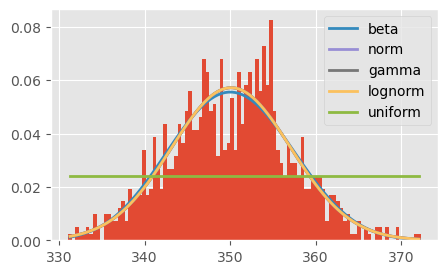

In [7]:
# Graph Style:
mpl.style.use('ggplot')
plt.rcParams["figure.figsize"] = (5, 3)

f_EsFlu = Fitter(df["Esfuerzo de Fluencia [MPa]"], distributions = ["gamma", "beta", "lognorm", "expon", "uniform", "norm"])
f_EsFlu.fit()
f_EsFlu.summary()

#### Best distribution for Yield Stress:

In [9]:
f_EsFlu.get_best(method = 'sumsquare_error')

{'beta': {'a': 12.31291090782714,
  'b': 13.187860689770371,
  'loc': 315.4133354663864,
  'scale': 71.88325645542777}}

## *Von Mises Year 1 (MPa):*

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.000270,1211.953647,1221.769158,inf,0.015852,9.596839e-01
gamma,0.000271,1213.967600,1228.690866,inf,0.017151,9.252994e-01
lognorm,0.000271,1213.962890,1228.686156,inf,0.017173,9.246081e-01
beta,0.000271,1218.350918,1237.981940,inf,0.017385,9.178077e-01
uniform,0.002515,1053.975048,1063.790559,inf,0.212594,3.858118e-40


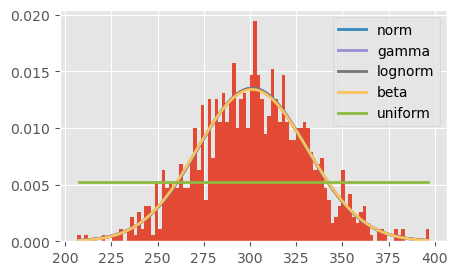

In [11]:
f_VonMises1 = Fitter(df["Esfuerzo de Von Mises Año 1 [MPa]"], distributions = ["gamma", "beta", "lognorm", "expon", "uniform", "norm"])
f_VonMises1.fit()
f_VonMises1.summary()

#### Best distribution for Von Mises in Year 1:

In [13]:
f_VonMises1.get_best(method = 'sumsquare_error')

{'norm': {'loc': 301.43538232378825, 'scale': 29.521222724675486}}

## *Von Mises Year 2 (MPa):*

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.000013,1484.501472,1499.224738,inf,0.020238,7.994878e-01
beta,0.000014,1490.325328,1509.956349,inf,0.020075,8.073266e-01
lognorm,0.000014,1481.350417,1496.073683,inf,0.023427,6.338668e-01
norm,0.000031,1559.114102,1568.929613,inf,0.073509,3.816250e-05
expon,0.000141,1419.340744,1429.156254,inf,0.245623,1.293660e-53


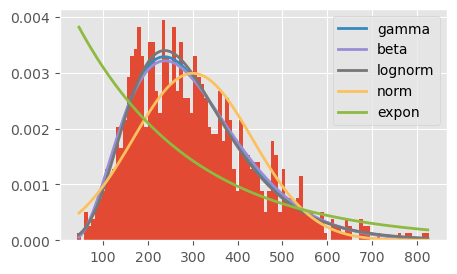

In [15]:
f_VonMises2 = Fitter(df["Esfuerzo de Von Mises Año 2 [MPa]"], distributions = ["gamma", "beta", "lognorm", "expon", "uniform", "norm"])
f_VonMises2.fit()
f_VonMises2.summary()

#### Best distribution for Von Mises in Year 2:

In [17]:
f_VonMises2.get_best(method = 'sumsquare_error')

{'gamma': {'a': 4.4801507278158095,
  'loc': 15.646857148181942,
  'scale': 63.44127193658571}}

## *Von Mises Year 3 (MPa):*

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.000411,1259.478154,1279.109175,inf,0.019138,8.502758e-01
norm,0.000594,1368.849889,1378.665400,inf,0.059584,1.578690e-03
lognorm,0.000594,1370.855396,1385.578662,inf,0.059585,1.578205e-03
gamma,0.000687,1396.448098,1411.171364,inf,0.070736,8.523260e-05
uniform,0.003872,1036.276489,1046.092000,inf,0.377759,1.008786e-128


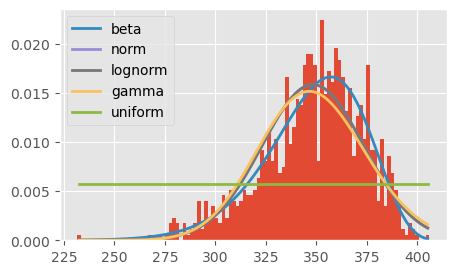

In [19]:
f_VonMises3 = Fitter(df["Esfuerzo de Von Mises Año 3 [MPa]"], distributions = ["gamma", "beta", "lognorm", "expon", "uniform", "norm"])
f_VonMises3.fit()
f_VonMises3.summary()

#### Best distribution for Von Mises in Year 3:

In [21]:
f_VonMises3.get_best(method = 'sumsquare_error')

{'beta': {'a': 142.4141783679492,
  'b': 7.191881919053987,
  'loc': -1028.0446694625468,
  'scale': 1445.8230811515655}}

## *Von Mises Year 4 (MPa):*

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.000127,1333.396846,1353.027867,inf,0.016617,9.409169e-01
norm,0.000375,1564.211352,1574.026862,inf,0.080486,4.406555e-06
lognorm,0.000375,1566.214057,1580.937323,inf,0.080486,4.406031e-06
gamma,0.000431,1610.859601,1625.582866,inf,0.083762,1.494215e-06
uniform,0.002248,1093.918603,1103.734114,inf,0.465399,5.989065e-199


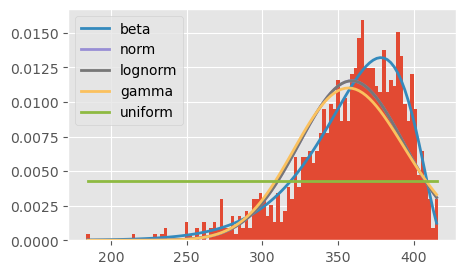

In [23]:
f_VonMises4 = Fitter(df["Esfuerzo de Von Mises Año 4 [MPa]"], distributions = ["gamma", "beta", "lognorm", "expon", "uniform", "norm"])
f_VonMises4.fit()
f_VonMises4.summary()

#### Best distribution for Von Mises in Year 4:

In [25]:
f_VonMises4.get_best(method = 'sumsquare_error')

{'beta': {'a': 81.76591246337296,
  'b': 3.035855468949329,
  'loc': -1304.3218084715836,
  'scale': 1724.9497346954618}}

## *Von Mises Year 5 (MPa):*

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.000172,1457.413050,1477.044071,inf,0.022216,6.983709e-01
norm,0.000835,2062.667152,2072.482663,inf,0.122462,1.578900e-13
lognorm,0.000836,2064.686401,2079.409667,inf,0.122463,1.578019e-13
gamma,0.000985,2118.408583,2133.131849,inf,0.133822,4.446297e-16
uniform,0.003596,1096.198524,1106.014035,inf,0.573794,2.885852e-312


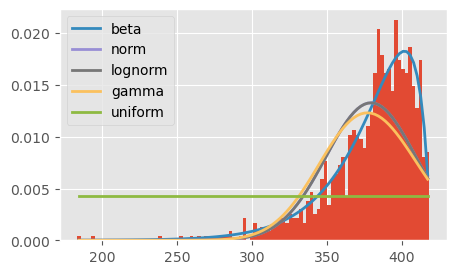

In [27]:
f_VonMises5 = Fitter(df["Esfuerzo de Von Mises Año 5 [MPa]"], distributions = ["gamma", "beta", "lognorm", "expon", "uniform", "norm"])
f_VonMises5.fit()
f_VonMises5.summary()

#### Best distribution for Von Mises in Year 5:

In [29]:
f_VonMises5.get_best(method = 'sumsquare_error')

{'beta': {'a': 701902.2431136796,
  'b': 1.7679477735560045,
  'loc': -15760426.304272782,
  'scale': 15760845.495380498}}

## *Von Mises New (MPa):*

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.000816,1068.277290,1087.908312,inf,0.017609,9.102431e-01
norm,0.000818,1064.126474,1073.941984,inf,0.015391,9.689301e-01
lognorm,0.000818,1066.126830,1080.850096,inf,0.015393,9.688792e-01
gamma,0.000837,1066.719274,1081.442540,inf,0.020128,8.047590e-01
uniform,0.009257,919.269464,929.084975,inf,0.215349,3.470260e-41


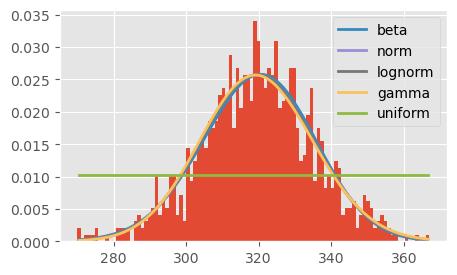

In [31]:
f_VonMisesNuevo = Fitter(df["Esfuerzo de Von Mises Nuevo [MPa]"], distributions = ["gamma", "beta", "lognorm", "expon", "uniform", "norm"])
f_VonMisesNuevo.fit()
f_VonMisesNuevo.summary()

#### Best distribution for Von Mises New:

In [33]:
f_VonMisesNuevo.get_best(method = 'sumsquare_error')

{'beta': {'a': 3276936.230110634,
  'b': 327.5992136717538,
  'loc': -2804621.80063901,
  'scale': 2805221.880172495}}

# **Random Data for each Distribution Function:**

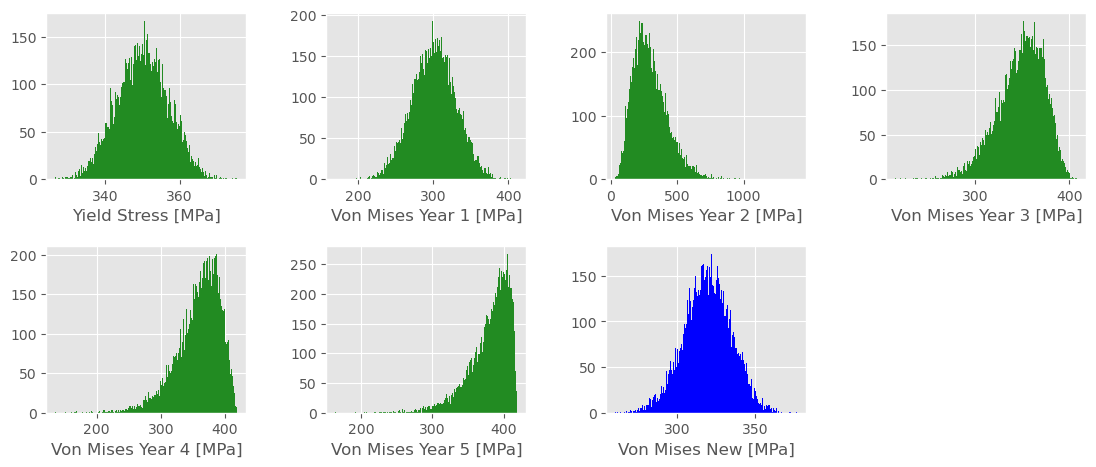

In [35]:
N = 10000

EsFlu_r = stats.beta.rvs(a = f_EsFlu.fitted_param["beta"][0], b = f_EsFlu.fitted_param["beta"][1], loc = f_EsFlu.fitted_param["beta"][2], scale = f_EsFlu.fitted_param["beta"][3], size = N)
VonMises1_r = stats.norm.rvs(loc = f_VonMises1.fitted_param["norm"][0], scale = f_VonMises1.fitted_param["norm"][1], size = N)
VonMises2_r = stats.gamma.rvs(a = f_VonMises2.fitted_param["gamma"][0], loc = f_VonMises2.fitted_param["gamma"][1], scale = f_VonMises2.fitted_param["gamma"][2], size = N)
VonMises3_r = stats.beta.rvs(a = f_VonMises3.fitted_param["beta"][0], b = f_VonMises3.fitted_param["beta"][1], loc = f_VonMises3.fitted_param["beta"][2], scale = f_VonMises3.fitted_param["beta"][3], size = N)
VonMises4_r = stats.beta.rvs(a = f_VonMises4.fitted_param["beta"][0], b = f_VonMises4.fitted_param["beta"][1], loc = f_VonMises4.fitted_param["beta"][2], scale = f_VonMises4.fitted_param["beta"][3], size = N)
VonMises5_r = stats.beta.rvs(a = f_VonMises5.fitted_param["beta"][0], b = f_VonMises5.fitted_param["beta"][1], loc = f_VonMises5.fitted_param["beta"][2], scale = f_VonMises5.fitted_param["beta"][3], size = N)
VonMisesNuevo_r = stats.beta.rvs(a = f_VonMisesNuevo.fitted_param["beta"][0], b = f_VonMisesNuevo.fitted_param["beta"][1], loc = f_VonMisesNuevo.fitted_param["beta"][2], scale = f_VonMisesNuevo.fitted_param["beta"][3], size = N)

# Plot Values Generated:
plt.rcParams["figure.figsize"] = (13,5)

plt.subplot(241)
plt.hist(EsFlu_r, bins=200, color = "forestgreen")
plt.xlabel("Yield Stress [MPa]")
plt.subplot(242)
plt.hist(VonMises1_r, bins=200, color = "forestgreen")
plt.xlabel("Von Mises Year 1 [MPa]")
plt.subplot(243)
plt.hist(VonMises2_r, bins=200, color = "forestgreen")
plt.xlabel("Von Mises Year 2 [MPa]")
plt.subplot(244)
plt.hist(VonMises3_r, bins=200, color = "forestgreen")
plt.xlabel("Von Mises Year 3 [MPa]")
plt.subplot(245)
plt.hist(VonMises4_r, bins=200, color = "forestgreen")
plt.xlabel("Von Mises Year 4 [MPa]")
plt.subplot(246)
plt.hist(VonMises5_r, bins=200, color = "forestgreen")
plt.xlabel("Von Mises Year 5 [MPa]")
plt.subplot(247)
plt.hist(VonMisesNuevo_r, bins=200, color = "b")
plt.xlabel("Von Mises New [MPa]")

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
plt.show()

# **Montecarlo Simulations:**
#### This simulation allows to generate random results for the Study of probabilities.

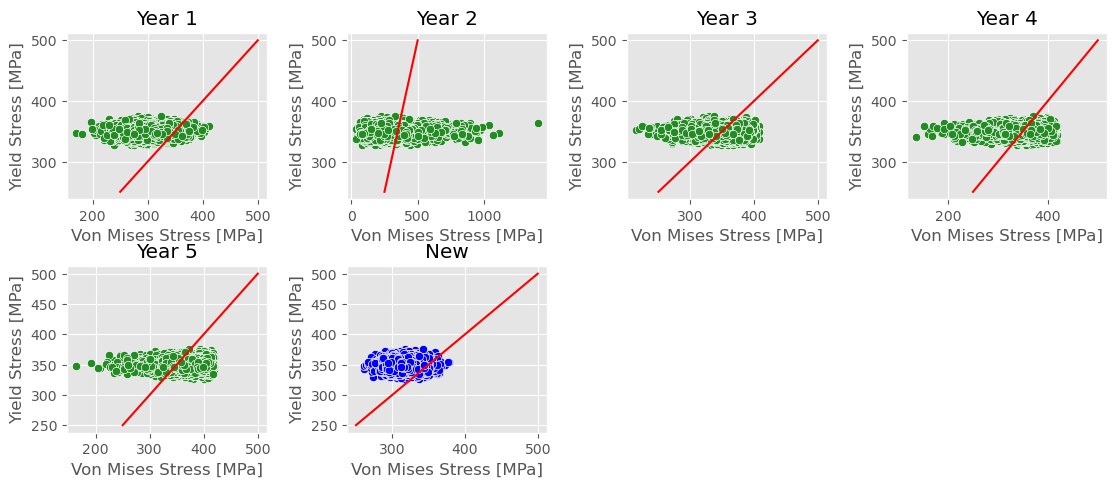

In [37]:
plt.subplot(241)
sns.scatterplot(x = VonMises1_r, y = EsFlu_r, color = "forestgreen")
plt.plot([250,500],[250,500], color = "r")
plt.xlabel("Von Mises Stress [MPa]")
plt.ylabel("Yield Stress [MPa]")
plt.title("Year 1")
plt.subplot(242)
sns.scatterplot(x = VonMises2_r, y = EsFlu_r, color = "forestgreen")
plt.plot([250,500],[250,500], color = "r")
plt.xlabel("Von Mises Stress [MPa]")
plt.ylabel("Yield Stress [MPa]")
plt.title("Year 2")
plt.subplot(243)
sns.scatterplot(x = VonMises3_r, y = EsFlu_r, color = "forestgreen")
plt.plot([250,500],[250,500], color = "r")
plt.xlabel("Von Mises Stress [MPa]")
plt.ylabel("Yield Stress [MPa]")
plt.title("Year 3")
plt.subplot(244)
sns.scatterplot(x = VonMises4_r, y = EsFlu_r, color = "forestgreen")
plt.plot([250,500],[250,500], color = "r")
plt.xlabel("Von Mises Stress [MPa]")
plt.ylabel("Yield Stress [MPa]")
plt.title("Year 4")
plt.subplot(245)
sns.scatterplot(x = VonMises5_r, y = EsFlu_r, color = "forestgreen")
plt.plot([250,500],[250,500], color = "r")
plt.xlabel("Von Mises Stress [MPa]")
plt.ylabel("Yield Stress [MPa]")
plt.title("Year 5")
plt.subplot(246)
sns.scatterplot(x = VonMisesNuevo_r, y = EsFlu_r, color='b') 
plt.plot([250,500],[250,500], color = "r")
plt.xlabel("Von Mises Stress [MPa]")
plt.ylabel("Yield Stress [MPa]")
plt.title("New")

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
plt.show()

# Probabilities with Montecarlo Simulation:
#### With the results obtained, the probability of the piece being damaged over the course of each year, or when new, is calculated.

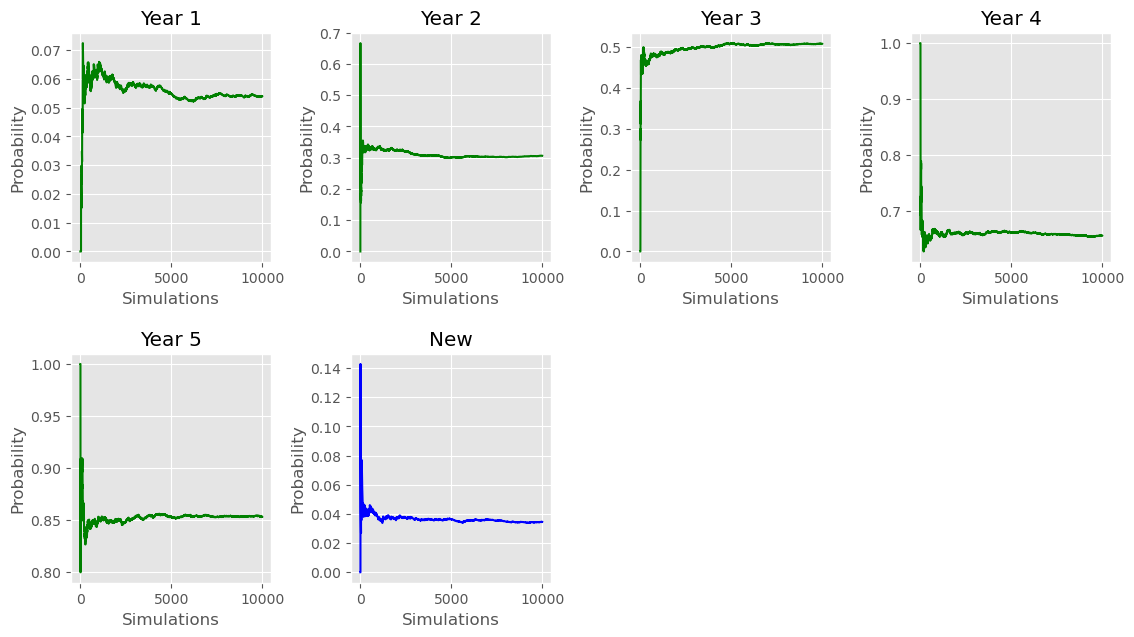

In [39]:
# g = Esfuerzo Fluencia - Von Mises
cont1, cont2, cont3, cont4, cont5, contN = 0, 0, 0, 0, 0, 0
prob1, prob2, prob3, prob4, prob5, probN = [], [], [], [], [], []

for i in range(N):
    if (EsFlu_r[i] - VonMises1_r[i] <=0):
        cont1 += 1
    prob1.append(cont1/(i+1))
    if (EsFlu_r[i] - VonMises2_r[i] <=0):
        cont2 += 1
    prob2.append(cont2/(i+1))
    if (EsFlu_r[i] - VonMises3_r[i] <=0):
        cont3 += 1
    prob3.append(cont3/(i+1))
    if (EsFlu_r[i] - VonMises4_r[i] <=0):
        cont4 += 1
    prob4.append(cont4/(i+1))
    if (EsFlu_r[i] - VonMises5_r[i] <=0):
        cont5 += 1
    prob5.append(cont5/(i+1))
    if (EsFlu_r[i] - VonMisesNuevo_r[i] <=0):
        contN += 1
    probN.append(contN/(i+1))

# Plot:
plt.subplot(241)
plt.plot(np.linspace(1,N,N), prob1, color='g')
plt.xlabel("Simulations")
plt.ylabel("Probability")
plt.title("Year 1")
plt.subplot(242)
plt.plot(np.linspace(1,N,N), prob2, color='g')
plt.xlabel("Simulations")
plt.ylabel("Probability")
plt.title("Year 2")
plt.subplot(243)
plt.plot(np.linspace(1,N,N), prob3, color='g')
plt.xlabel("Simulations")
plt.ylabel("Probability")
plt.title("Year 3")
plt.subplot(244)
plt.plot(np.linspace(1,N,N), prob4, color='g')
plt.xlabel("Simulations")
plt.ylabel("Probability")
plt.title("Year 4")
plt.subplot(245)
plt.plot(np.linspace(1,N,N), prob5, color='g')
plt.xlabel("Simulations")
plt.ylabel("Probability")
plt.title("Year 5")
plt.subplot(246)
plt.plot(np.linspace(1,N,N), probN, color='b')
plt.xlabel("Simulations")
plt.ylabel("Probability")
plt.title("New")

plt.subplots_adjust(left=0.1, right=0.9, top=1.2, bottom=0.1, wspace=0.4, hspace=0.4)
plt.show()

# Probabilities:

In [41]:
print(f"The probability of failure in 1 Year is: {prob1[-1]:.3f} o {prob1[-1] *100:.1f} %")
print(f"The probability of failure in 2 Years is: {prob2[-1]:.3f} o {prob2[-1] *100:.1f} %")
print(f"The probability of failure in 3 Years is: {prob3[-1]:.3f} o {prob3[-1] *100:.1f} %")
print(f"The probability of failure in 4 Years is: {prob4[-1]:.3f} o {prob4[-1] *100:.1f} %")
print(f"The probability of failure in 5 Years is: {prob5[-1]:.3f} o {prob5[-1] *100:.1f} %")
print(f"The probability of failure with a new part: {probN[-1]:.3f} o {probN[-1] *100:.1f} %")

The probability of failure in 1 Year is: 0.054 o 5.4 %
The probability of failure in 2 Years is: 0.306 o 30.6 %
The probability of failure in 3 Years is: 0.508 o 50.8 %
The probability of failure in 4 Years is: 0.656 o 65.6 %
The probability of failure in 5 Years is: 0.853 o 85.3 %
The probability of failure with a new part: 0.035 o 3.5 %
